### Pre-Selection

In [48]:
def cap_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

In [49]:
import pandas as pd
import src.functions as src
import os 
import numpy as np
features = "dataset1_features.csv"
features = pd.read_csv(features, sep=',', header=0, index_col=None)
Y = features[['labels']]

X_all = features.drop('labels', axis=1)
# Apply the function to each column except the labels
for column in X_all.columns:
    if column != 'labels':
        X_all_new = cap_outliers(X_all, column)


all_pre= ['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_','25_','26_','27_','28_','29_','30_','33_','34_']
X_all_pre=X_all_new[[col for col in X_all_new.columns if any(col.startswith(prefix) for prefix in all_pre)]]
all_post=  ['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_','19_','20_','21_','22_','23_','24_','31_','32_','35_','36_']
X_all_post=X_all_new[[col for col in X_all_new.columns if any(col.startswith(prefix) for prefix in all_post)]]
print('All Features:')
print('Total: ' + str(len(X_all_new.columns))) 
print('Pre: ' + str(len(X_all_pre.columns)))
print('Post: ' + str(len(X_all_post.columns)))

theta_prefixes= ['1_','2_','3_','4_','5_','6_','7_','8_','9_','10_','11_','12_','13_','14_','15_','16_','17_','18_']
X_theta= X_all_new[[col for col in X_all_new.columns if any(col.startswith(prefix) for prefix in theta_prefixes)]]
theta_pre= ['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_']
X_theta_pre= X_theta[[col for col in X_theta.columns if any(col.startswith(prefix) for prefix in theta_pre)]]
theta_post= ['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_']
X_theta_post= X_theta[[col for col in X_theta.columns if any(col.startswith(prefix) for prefix in theta_post)]]
print('Theta Features:')
print('Total: ' + str(len(X_theta.columns)))
print('Pre: ' + str(len(X_theta_pre.columns)))
print('Post: ' + str(len(X_theta_post.columns)))

frequency_prefixes= ['1_','2_','3_','4_','5_','6_','7_','8_','9_','10_','11_','12_','13_','14_','15_','16_','17_','18_','19_','20_','21_','22_','23_','24_','25_','26_','27_','28_','29_','30_']
X_frequency= X_all_new[[col for col in X_all_new.columns if any(col.startswith(prefix) for prefix in frequency_prefixes)]]
frequency_pre=['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_','25_','26_','27_','28_','29_','30_']
X_frequency_pre= X_frequency[[col for col in X_frequency.columns if any(col.startswith(prefix) for prefix in frequency_pre)]]
frequency_post=['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_','19_','20_','21_','22_','23_','24_']
X_frequency_post= X_frequency[[col for col in X_frequency.columns if any(col.startswith(prefix) for prefix in frequency_post)]]
print('Frequency Features:')
print('Total: ' + str(len(X_frequency.columns)))
print('Pre: ' + str(len(X_frequency_pre.columns)))
print('Post: ' + str(len(X_frequency_post.columns)))

temporal_prefixes= ['31_','32_','33_','34_','35_','36_']
X_temporal= X_all_new[[col for col in X_all_new.columns if any(col.startswith(prefix) for prefix in temporal_prefixes)]]
temporal_pre= ['33_','34_']
X_temporal_pre= X_temporal[[col for col in X_temporal.columns if any(col.startswith(prefix) for prefix in temporal_pre)]] 
temporal_post= ['31_','32_','35_','36_']
X_temporal_post= X_temporal[[col for col in X_temporal.columns if any(col.startswith(prefix) for prefix in temporal_post)]]
print('Temporal Features:')
print('Total: ' + str(len(X_temporal.columns)))
print('Pre: ' + str(len(X_temporal_pre.columns)))
print('Post: ' + str(len(X_temporal_post.columns)))

All Features:
Total: 1549
Pre: 804
Post: 806
Theta Features:
Total: 587
Pre: 324
Post: 324
Frequency Features:
Total: 1307
Pre: 684
Post: 684
Temporal Features:
Total: 242
Pre: 120
Post: 122


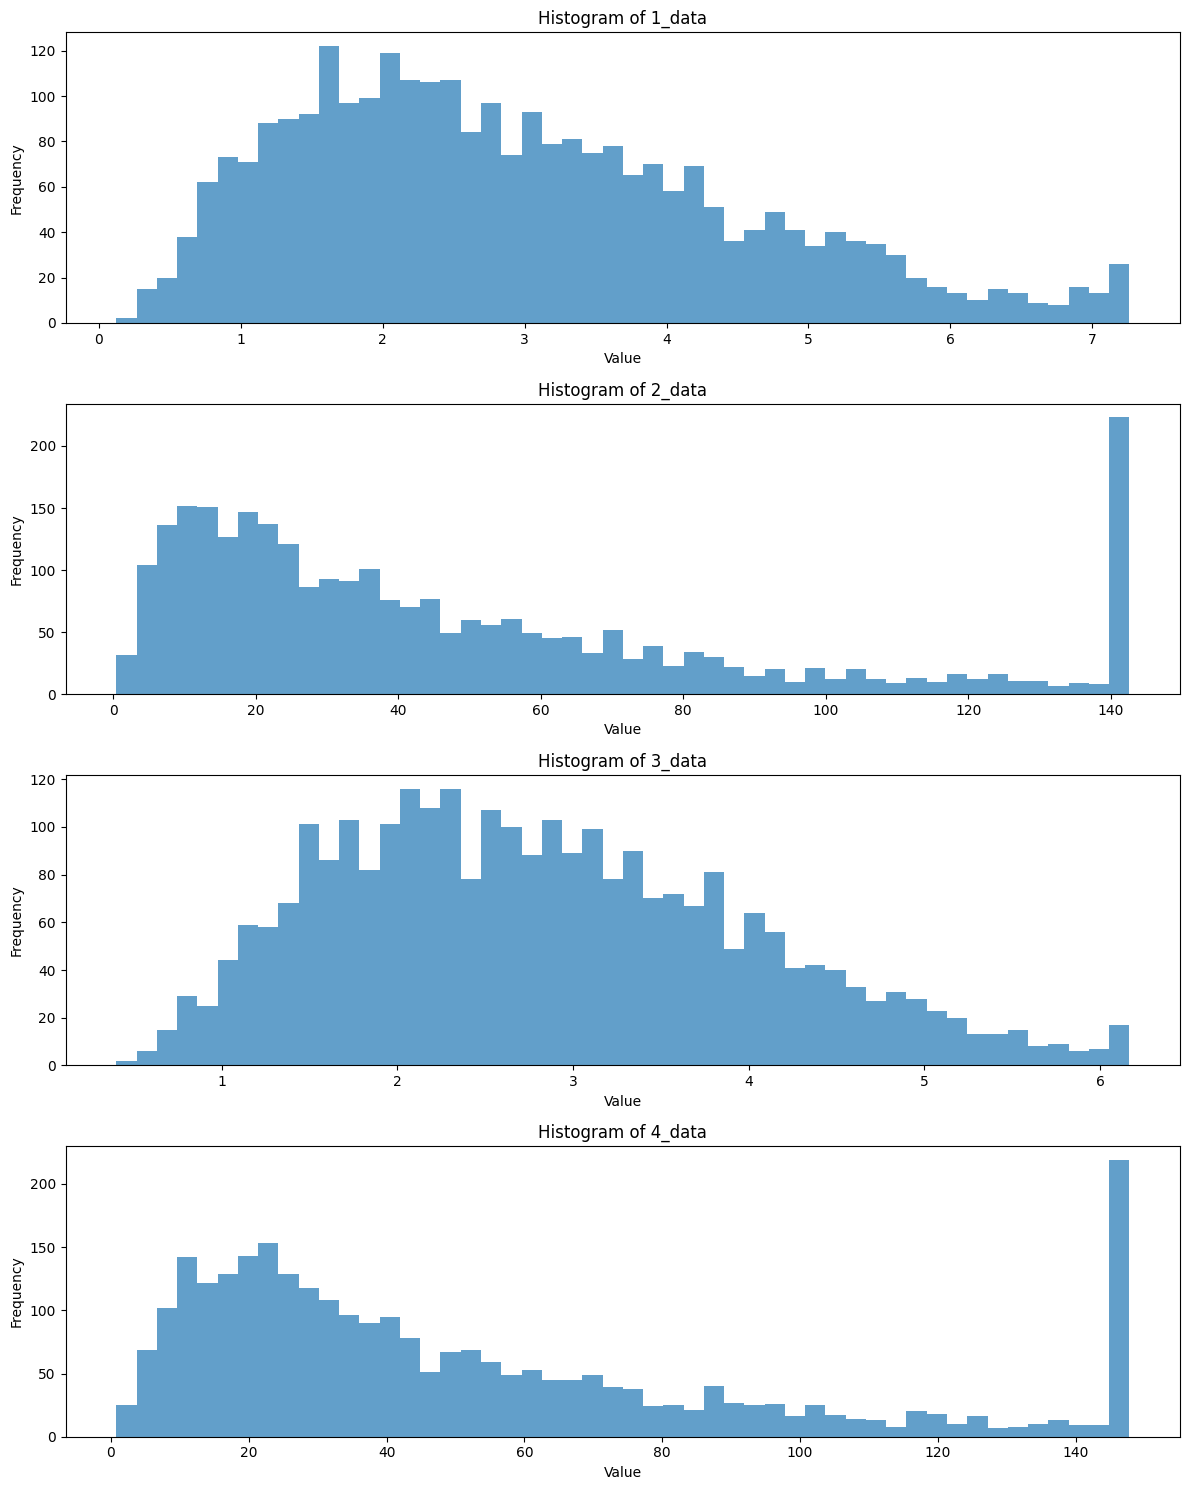

In [52]:
import matplotlib.pyplot as plt

# Plot histograms for a few columns
columns_to_plot = ['1_data', '2_data', '3_data', '4_data']

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(12, 15))

for i, column in enumerate(columns_to_plot):
    axes[i].hist(X_all_new[column], bins=50, alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [53]:
from importlib import reload
reload(src)

<module 'src.functions' from 'c:\\Users\\User\\Documents\\GitHub\\Tese\\src\\functions.py'>

## Feature Selection Algorithm

In [ ]:
from sklearn.feature_selection import SelectKBest
params=src.grid_search(X_all,Y)
print(params)
selector= SelectKBest(k=40) #test_size=0.1
X_new= selector.fit_transform(X_all,Y)
X_new= X_all.columns[selector.get_support()].tolist()
test_size=0.05
while test_size<=0.5:
    print('Test_size: {:.2f}'.format(test_size))
    src.classification(len(X_new),X_all[X_new],Y, params,test_size)
    test_size+=0.05
print(X_new)
print('--------------------------------------------------------------------------------------------------------------------------')

from mrmr import mrmr_classif
X_new= mrmr_classif(X_all,Y,40)
test_size=0.05
while test_size<=0.5:
    print('Test_size: {:.2f}'.format(test_size))
    src.classification(len(X_new),X_all[X_new],Y, params,test_size)
    test_size+=0.05
print(X_new)
print('--------------------------------------------------------------------------------------------------------------------------')

X_new= src.camila_feat_selection(X_all,Y)
test_size=0.05
while test_size<=0.5:
    print('Test_size: {:.2f}'.format(test_size))
    src.classification(len(X_new),X_all[X_new],Y, params,test_size)
    test_size+=0.05
print(X_new)

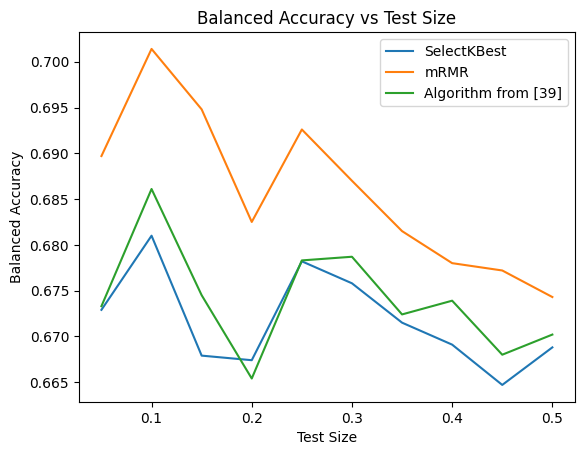

In [47]:
x=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
yklearn= [0.6729, 0.6810, 0.6679,0.6674,0.6782,0.6758,0.6715,0.6691,0.6647,0.6688]
ymrmr= [0.6897,0.7014,0.6948,0.6825,0.6926,0.6870,0.6815,0.6780,0.6772,0.6743]
ycamila= [0.6733,0.6861,0.6745,0.6654,0.6783,0.6787,0.6724,0.6739,0.6680,0.6702]

import matplotlib.pyplot as plt
plt.plot(x,yklearn, label='SelectKBest')
plt.plot(x,ymrmr, label='mRMR')
plt.plot(x,ycamila, label='Algorithm from [39]')
plt.xlabel('Test Size')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy vs Test Size')
plt.legend()
plt.show()

## Training set

### Feature Selection

#### Theta Features

In [ ]:
best_params= src.grid_search(X_theta,Y)
n_feature, feature_df,  clf, scaler=src.best_n_features(X_theta,Y,best_params)
best_theta_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_theta_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_theta_features1.txt'):
    os.remove('best_theta_features1.txt')
with open('best_theta_features1.txt', 'w') as file:
    file.write(', '.join(best_theta_features))
print("File created and list stored successfully.")

In [69]:
X_theta['labels'] = features['labels'].values
correct=X_theta[X_theta['labels']==0]
erroneous=X_theta[X_theta['labels']==1]
correct_sample = correct.sample(n=600, random_state=42)
erroneous_sample = erroneous.sample(n=168, random_state=42)
X_example= pd.concat([correct_sample, erroneous_sample])
Y_example= X_example[['labels']]

100%|██████████| 1/1 [00:00<00:00, 501.35it/s]


Number of features used: 1
Mean Sensitivity: 0.7571
Std Sensitivity: 0.1080
Mean Specificity: 0.4725
Std Specificity: 0.0598
Mean Balanced Accuracy: 0.6148
Std Balanced Accuracy: 0.0522
Mean R^2: -1.7010
Std R^2: 0.2597
Mean ROC AUC: 0.6735
Std ROC AUC: 0.0715
Confusion Matrix for one of the iterations:
 [[29 31]
 [ 7 10]]


100%|██████████| 2/2 [00:00<00:00, 16.81it/s]


Number of features used: 2
Mean Sensitivity: 0.7376
Std Sensitivity: 0.1198
Mean Specificity: 0.5433
Std Specificity: 0.0558
Mean Balanced Accuracy: 0.6405
Std Balanced Accuracy: 0.0643
Mean R^2: -1.4051
Std R^2: 0.2865
Mean ROC AUC: 0.6846
Std ROC AUC: 0.0805
Confusion Matrix for one of the iterations:
 [[32 28]
 [ 9  8]]


100%|██████████| 3/3 [00:00<00:00, 12.60it/s]


Number of features used: 3
Mean Sensitivity: 0.7200
Std Sensitivity: 0.1256
Mean Specificity: 0.5867
Std Specificity: 0.0535
Mean Balanced Accuracy: 0.6533
Std Balanced Accuracy: 0.0664
Mean R^2: -1.2315
Std R^2: 0.2811
Mean ROC AUC: 0.6932
Std ROC AUC: 0.0739
Confusion Matrix for one of the iterations:
 [[31 29]
 [10  7]]


100%|██████████| 4/4 [00:00<00:00, 12.16it/s]


Number of features used: 4
Mean Sensitivity: 0.6618
Std Sensitivity: 0.1252
Mean Specificity: 0.6563
Std Specificity: 0.0642
Mean Balanced Accuracy: 0.6590
Std Balanced Accuracy: 0.0667
Mean R^2: -0.9907
Std R^2: 0.3143
Mean ROC AUC: 0.7140
Std ROC AUC: 0.0662
Confusion Matrix for one of the iterations:
 [[33 27]
 [ 9  8]]


100%|██████████| 5/5 [00:00<00:00, 10.86it/s]


Number of features used: 5
Mean Sensitivity: 0.6706
Std Sensitivity: 0.1138
Mean Specificity: 0.6473
Std Specificity: 0.0564
Mean Balanced Accuracy: 0.6590
Std Balanced Accuracy: 0.0600
Mean R^2: -1.0201
Std R^2: 0.2764
Mean ROC AUC: 0.7199
Std ROC AUC: 0.0603
Confusion Matrix for one of the iterations:
 [[34 26]
 [ 8  9]]


100%|██████████| 6/6 [00:00<00:00,  8.01it/s]


Number of features used: 6
Mean Sensitivity: 0.6641
Std Sensitivity: 0.1057
Mean Specificity: 0.6508
Std Specificity: 0.0603
Mean Balanced Accuracy: 0.6575
Std Balanced Accuracy: 0.0569
Mean R^2: -1.0126
Std R^2: 0.2867
Mean ROC AUC: 0.7335
Std ROC AUC: 0.0579
Confusion Matrix for one of the iterations:
 [[36 24]
 [ 7 10]]


100%|██████████| 7/7 [00:00<00:00, 10.19it/s]


Number of features used: 7
Mean Sensitivity: 0.7065
Std Sensitivity: 0.1057
Mean Specificity: 0.6643
Std Specificity: 0.0575
Mean Balanced Accuracy: 0.6854
Std Balanced Accuracy: 0.0546
Mean R^2: -0.8971
Std R^2: 0.2673
Mean ROC AUC: 0.7480
Std ROC AUC: 0.0569
Confusion Matrix for one of the iterations:
 [[41 19]
 [ 6 11]]


100%|██████████| 8/8 [00:00<00:00,  9.66it/s]


Number of features used: 8
Mean Sensitivity: 0.6965
Std Sensitivity: 0.1014
Mean Specificity: 0.6735
Std Specificity: 0.0582
Mean Balanced Accuracy: 0.6850
Std Balanced Accuracy: 0.0560
Mean R^2: -0.8684
Std R^2: 0.2825
Mean ROC AUC: 0.7481
Std ROC AUC: 0.0585
Confusion Matrix for one of the iterations:
 [[42 18]
 [ 5 12]]


100%|██████████| 9/9 [00:00<00:00, 10.27it/s]


Number of features used: 9
Mean Sensitivity: 0.7029
Std Sensitivity: 0.1089
Mean Specificity: 0.6680
Std Specificity: 0.0582
Mean Balanced Accuracy: 0.6855
Std Balanced Accuracy: 0.0592
Mean R^2: -0.8850
Std R^2: 0.2860
Mean ROC AUC: 0.7471
Std ROC AUC: 0.0609
Confusion Matrix for one of the iterations:
 [[41 19]
 [ 6 11]]


100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Number of features used: 10
Mean Sensitivity: 0.6900
Std Sensitivity: 0.1068
Mean Specificity: 0.6678
Std Specificity: 0.0590
Mean Balanced Accuracy: 0.6789
Std Balanced Accuracy: 0.0576
Mean R^2: -0.9024
Std R^2: 0.2843
Mean ROC AUC: 0.7455
Std ROC AUC: 0.0608
Confusion Matrix for one of the iterations:
 [[40 20]
 [ 6 11]]


100%|██████████| 11/11 [00:01<00:00,  8.82it/s]


Number of features used: 11
Mean Sensitivity: 0.6871
Std Sensitivity: 0.1167
Mean Specificity: 0.6772
Std Specificity: 0.0590
Mean Balanced Accuracy: 0.6821
Std Balanced Accuracy: 0.0603
Mean R^2: -0.8639
Std R^2: 0.2810
Mean ROC AUC: 0.7470
Std ROC AUC: 0.0616
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 6 11]]


100%|██████████| 12/12 [00:01<00:00,  8.27it/s]


Number of features used: 12
Mean Sensitivity: 0.6918
Std Sensitivity: 0.1101
Mean Specificity: 0.6770
Std Specificity: 0.0556
Mean Balanced Accuracy: 0.6844
Std Balanced Accuracy: 0.0561
Mean R^2: -0.8586
Std R^2: 0.2612
Mean ROC AUC: 0.7500
Std ROC AUC: 0.0571
Confusion Matrix for one of the iterations:
 [[43 17]
 [ 6 11]]


100%|██████████| 13/13 [00:01<00:00,  7.47it/s]


Number of features used: 13
Mean Sensitivity: 0.6676
Std Sensitivity: 0.1086
Mean Specificity: 0.7003
Std Specificity: 0.0501
Mean Balanced Accuracy: 0.6840
Std Balanced Accuracy: 0.0581
Mean R^2: -0.7838
Std R^2: 0.2573
Mean ROC AUC: 0.7575
Std ROC AUC: 0.0553
Confusion Matrix for one of the iterations:
 [[41 19]
 [ 7 10]]


100%|██████████| 14/14 [00:01<00:00,  7.91it/s]


Number of features used: 14
Mean Sensitivity: 0.6918
Std Sensitivity: 0.1036
Mean Specificity: 0.7038
Std Specificity: 0.0518
Mean Balanced Accuracy: 0.6978
Std Balanced Accuracy: 0.0570
Mean R^2: -0.7370
Std R^2: 0.2653
Mean ROC AUC: 0.7588
Std ROC AUC: 0.0553
Confusion Matrix for one of the iterations:
 [[43 17]
 [ 7 10]]


100%|██████████| 15/15 [00:01<00:00,  9.54it/s]


Number of features used: 15
Mean Sensitivity: 0.6871
Std Sensitivity: 0.1032
Mean Specificity: 0.7057
Std Specificity: 0.0514
Mean Balanced Accuracy: 0.6964
Std Balanced Accuracy: 0.0564
Mean R^2: -0.7348
Std R^2: 0.2615
Mean ROC AUC: 0.7566
Std ROC AUC: 0.0553
Confusion Matrix for one of the iterations:
 [[45 15]
 [ 6 11]]


100%|██████████| 16/16 [00:02<00:00,  7.55it/s]


Number of features used: 16
Mean Sensitivity: 0.6853
Std Sensitivity: 0.1070
Mean Specificity: 0.6993
Std Specificity: 0.0516
Mean Balanced Accuracy: 0.6923
Std Balanced Accuracy: 0.0580
Mean R^2: -0.7657
Std R^2: 0.2643
Mean ROC AUC: 0.7544
Std ROC AUC: 0.0562
Confusion Matrix for one of the iterations:
 [[43 17]
 [ 7 10]]


100%|██████████| 17/17 [00:02<00:00,  7.21it/s]


Number of features used: 17
Mean Sensitivity: 0.6894
Std Sensitivity: 0.1039
Mean Specificity: 0.7092
Std Specificity: 0.0496
Mean Balanced Accuracy: 0.6993
Std Balanced Accuracy: 0.0535
Mean R^2: -0.7159
Std R^2: 0.2406
Mean ROC AUC: 0.7568
Std ROC AUC: 0.0590
Confusion Matrix for one of the iterations:
 [[45 15]
 [ 6 11]]


100%|██████████| 18/18 [00:01<00:00,  9.05it/s]


Number of features used: 18
Mean Sensitivity: 0.6782
Std Sensitivity: 0.1054
Mean Specificity: 0.7075
Std Specificity: 0.0484
Mean Balanced Accuracy: 0.6929
Std Balanced Accuracy: 0.0527
Mean R^2: -0.7378
Std R^2: 0.2295
Mean ROC AUC: 0.7563
Std ROC AUC: 0.0594
Confusion Matrix for one of the iterations:
 [[43 17]
 [ 6 11]]


100%|██████████| 19/19 [00:02<00:00,  8.31it/s]


Number of features used: 19
Mean Sensitivity: 0.6724
Std Sensitivity: 0.1069
Mean Specificity: 0.7077
Std Specificity: 0.0492
Mean Balanced Accuracy: 0.6900
Std Balanced Accuracy: 0.0554
Mean R^2: -0.7446
Std R^2: 0.2439
Mean ROC AUC: 0.7588
Std ROC AUC: 0.0571
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 8  9]]


100%|██████████| 20/20 [00:02<00:00,  6.85it/s]


Number of features used: 20
Mean Sensitivity: 0.6747
Std Sensitivity: 0.1057
Mean Specificity: 0.7080
Std Specificity: 0.0516
Mean Balanced Accuracy: 0.6914
Std Balanced Accuracy: 0.0577
Mean R^2: -0.7400
Std R^2: 0.2646
Mean ROC AUC: 0.7559
Std ROC AUC: 0.0591
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 8  9]]


100%|██████████| 21/21 [00:02<00:00,  8.77it/s]


Number of features used: 21
Mean Sensitivity: 0.6694
Std Sensitivity: 0.1065
Mean Specificity: 0.7082
Std Specificity: 0.0508
Mean Balanced Accuracy: 0.6888
Std Balanced Accuracy: 0.0567
Mean R^2: -0.7461
Std R^2: 0.2559
Mean ROC AUC: 0.7532
Std ROC AUC: 0.0588
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 8  9]]


100%|██████████| 22/22 [00:02<00:00,  8.05it/s]


Number of features used: 22
Mean Sensitivity: 0.6647
Std Sensitivity: 0.1027
Mean Specificity: 0.7067
Std Specificity: 0.0499
Mean Balanced Accuracy: 0.6857
Std Balanced Accuracy: 0.0535
Mean R^2: -0.7589
Std R^2: 0.2433
Mean ROC AUC: 0.7519
Std ROC AUC: 0.0598
Confusion Matrix for one of the iterations:
 [[46 14]
 [ 8  9]]


100%|██████████| 23/23 [00:03<00:00,  7.60it/s]


Number of features used: 23
Mean Sensitivity: 0.6753
Std Sensitivity: 0.1086
Mean Specificity: 0.7072
Std Specificity: 0.0518
Mean Balanced Accuracy: 0.6912
Std Balanced Accuracy: 0.0576
Mean R^2: -0.7431
Std R^2: 0.2600
Mean ROC AUC: 0.7540
Std ROC AUC: 0.0600
Confusion Matrix for one of the iterations:
 [[47 13]
 [ 8  9]]


100%|██████████| 24/24 [00:02<00:00,  8.55it/s]


Number of features used: 24
Mean Sensitivity: 0.6988
Std Sensitivity: 0.1092
Mean Specificity: 0.7112
Std Specificity: 0.0546
Mean Balanced Accuracy: 0.7050
Std Balanced Accuracy: 0.0593
Mean R^2: -0.6948
Std R^2: 0.2756
Mean ROC AUC: 0.7582
Std ROC AUC: 0.0600
Confusion Matrix for one of the iterations:
 [[48 12]
 [ 8  9]]


100%|██████████| 25/25 [00:03<00:00,  8.24it/s]


Number of features used: 25
Mean Sensitivity: 0.6912
Std Sensitivity: 0.1127
Mean Specificity: 0.7113
Std Specificity: 0.0528
Mean Balanced Accuracy: 0.7013
Std Balanced Accuracy: 0.0593
Mean R^2: -0.7038
Std R^2: 0.2646
Mean ROC AUC: 0.7561
Std ROC AUC: 0.0589
Confusion Matrix for one of the iterations:
 [[47 13]
 [ 8  9]]


100%|██████████| 26/26 [00:03<00:00,  6.70it/s]


Number of features used: 26
Mean Sensitivity: 0.6871
Std Sensitivity: 0.1106
Mean Specificity: 0.7113
Std Specificity: 0.0516
Mean Balanced Accuracy: 0.6992
Std Balanced Accuracy: 0.0579
Mean R^2: -0.7091
Std R^2: 0.2568
Mean ROC AUC: 0.7544
Std ROC AUC: 0.0600
Confusion Matrix for one of the iterations:
 [[45 15]
 [ 7 10]]


100%|██████████| 27/27 [00:03<00:00,  8.34it/s]


Number of features used: 27
Mean Sensitivity: 0.6771
Std Sensitivity: 0.1151
Mean Specificity: 0.7205
Std Specificity: 0.0536
Mean Balanced Accuracy: 0.6988
Std Balanced Accuracy: 0.0628
Mean R^2: -0.6804
Std R^2: 0.2806
Mean ROC AUC: 0.7589
Std ROC AUC: 0.0596
Confusion Matrix for one of the iterations:
 [[43 17]
 [ 8  9]]


100%|██████████| 28/28 [00:03<00:00,  8.62it/s]


Number of features used: 28
Mean Sensitivity: 0.6753
Std Sensitivity: 0.1163
Mean Specificity: 0.7193
Std Specificity: 0.0536
Mean Balanced Accuracy: 0.6973
Std Balanced Accuracy: 0.0627
Mean R^2: -0.6880
Std R^2: 0.2783
Mean ROC AUC: 0.7570
Std ROC AUC: 0.0602
Confusion Matrix for one of the iterations:
 [[43 17]
 [ 8  9]]


100%|██████████| 29/29 [00:03<00:00,  8.32it/s]


Number of features used: 29
Mean Sensitivity: 0.6741
Std Sensitivity: 0.1163
Mean Specificity: 0.7165
Std Specificity: 0.0532
Mean Balanced Accuracy: 0.6953
Std Balanced Accuracy: 0.0616
Mean R^2: -0.7023
Std R^2: 0.2708
Mean ROC AUC: 0.7547
Std ROC AUC: 0.0600
Confusion Matrix for one of the iterations:
 [[43 17]
 [ 8  9]]


100%|██████████| 30/30 [00:03<00:00,  8.58it/s]


Number of features used: 30
Mean Sensitivity: 0.6641
Std Sensitivity: 0.1195
Mean Specificity: 0.7233
Std Specificity: 0.0556
Mean Balanced Accuracy: 0.6937
Std Balanced Accuracy: 0.0619
Mean R^2: -0.6842
Std R^2: 0.2742
Mean ROC AUC: 0.7572
Std ROC AUC: 0.0608
Confusion Matrix for one of the iterations:
 [[45 15]
 [ 6 11]]


100%|██████████| 31/31 [00:03<00:00,  8.33it/s]


Number of features used: 31
Mean Sensitivity: 0.6694
Std Sensitivity: 0.1176
Mean Specificity: 0.7200
Std Specificity: 0.0522
Mean Balanced Accuracy: 0.6947
Std Balanced Accuracy: 0.0601
Mean R^2: -0.6925
Std R^2: 0.2578
Mean ROC AUC: 0.7553
Std ROC AUC: 0.0607
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 7 10]]


100%|██████████| 32/32 [00:03<00:00,  8.45it/s]


Number of features used: 32
Mean Sensitivity: 0.6659
Std Sensitivity: 0.1128
Mean Specificity: 0.7187
Std Specificity: 0.0515
Mean Balanced Accuracy: 0.6923
Std Balanced Accuracy: 0.0581
Mean R^2: -0.7031
Std R^2: 0.2538
Mean ROC AUC: 0.7540
Std ROC AUC: 0.0618
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 7 10]]


100%|██████████| 33/33 [00:03<00:00,  8.59it/s]


Number of features used: 33
Mean Sensitivity: 0.6794
Std Sensitivity: 0.1063
Mean Specificity: 0.7280
Std Specificity: 0.0505
Mean Balanced Accuracy: 0.7037
Std Balanced Accuracy: 0.0577
Mean R^2: -0.6434
Std R^2: 0.2604
Mean ROC AUC: 0.7611
Std ROC AUC: 0.0609
Confusion Matrix for one of the iterations:
 [[45 15]
 [ 6 11]]


100%|██████████| 34/34 [00:04<00:00,  8.05it/s]


Number of features used: 34
Mean Sensitivity: 0.6847
Std Sensitivity: 0.1044
Mean Specificity: 0.7265
Std Specificity: 0.0504
Mean Balanced Accuracy: 0.7056
Std Balanced Accuracy: 0.0547
Mean R^2: -0.6434
Std R^2: 0.2478
Mean ROC AUC: 0.7613
Std ROC AUC: 0.0603
Confusion Matrix for one of the iterations:
 [[45 15]
 [ 5 12]]


100%|██████████| 35/35 [00:03<00:00,  8.94it/s]


Number of features used: 35
Mean Sensitivity: 0.6835
Std Sensitivity: 0.1061
Mean Specificity: 0.7237
Std Specificity: 0.0527
Mean Balanced Accuracy: 0.7036
Std Balanced Accuracy: 0.0567
Mean R^2: -0.6578
Std R^2: 0.2619
Mean ROC AUC: 0.7592
Std ROC AUC: 0.0594
Confusion Matrix for one of the iterations:
 [[45 15]
 [ 5 12]]


100%|██████████| 36/36 [00:04<00:00,  8.61it/s]


Number of features used: 36
Mean Sensitivity: 0.6788
Std Sensitivity: 0.1102
Mean Specificity: 0.7227
Std Specificity: 0.0521
Mean Balanced Accuracy: 0.7007
Std Balanced Accuracy: 0.0577
Mean R^2: -0.6683
Std R^2: 0.2583
Mean ROC AUC: 0.7569
Std ROC AUC: 0.0593
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 5 12]]


100%|██████████| 37/37 [00:04<00:00,  8.65it/s]


Number of features used: 37
Mean Sensitivity: 0.6876
Std Sensitivity: 0.1087
Mean Specificity: 0.7180
Std Specificity: 0.0555
Mean Balanced Accuracy: 0.7028
Std Balanced Accuracy: 0.0582
Mean R^2: -0.6781
Std R^2: 0.2734
Mean ROC AUC: 0.7567
Std ROC AUC: 0.0583
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 5 12]]


100%|██████████| 38/38 [00:04<00:00,  8.42it/s]


Number of features used: 38
Mean Sensitivity: 0.6788
Std Sensitivity: 0.1063
Mean Specificity: 0.7260
Std Specificity: 0.0531
Mean Balanced Accuracy: 0.7024
Std Balanced Accuracy: 0.0558
Mean R^2: -0.6532
Std R^2: 0.2583
Mean ROC AUC: 0.7565
Std ROC AUC: 0.0591
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 5 12]]


100%|██████████| 39/39 [00:04<00:00,  8.17it/s]


Number of features used: 39
Mean Sensitivity: 0.6700
Std Sensitivity: 0.1035
Mean Specificity: 0.7183
Std Specificity: 0.0508
Mean Balanced Accuracy: 0.6942
Std Balanced Accuracy: 0.0533
Mean R^2: -0.6993
Std R^2: 0.2438
Mean ROC AUC: 0.7545
Std ROC AUC: 0.0609
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 5 12]]


100%|██████████| 40/40 [00:04<00:00,  8.65it/s]


Number of features used: 40
Mean Sensitivity: 0.6629
Std Sensitivity: 0.1018
Mean Specificity: 0.7173
Std Specificity: 0.0533
Mean Balanced Accuracy: 0.6901
Std Balanced Accuracy: 0.0536
Mean R^2: -0.7129
Std R^2: 0.2555
Mean ROC AUC: 0.7531
Std ROC AUC: 0.0600
Confusion Matrix for one of the iterations:
 [[43 17]
 [ 5 12]]


100%|██████████| 41/41 [00:04<00:00,  8.61it/s]


Number of features used: 41
Mean Sensitivity: 0.6582
Std Sensitivity: 0.1051
Mean Specificity: 0.7177
Std Specificity: 0.0510
Mean Balanced Accuracy: 0.6880
Std Balanced Accuracy: 0.0538
Mean R^2: -0.7174
Std R^2: 0.2442
Mean ROC AUC: 0.7518
Std ROC AUC: 0.0602
Confusion Matrix for one of the iterations:
 [[44 16]
 [ 5 12]]


100%|██████████| 42/42 [00:05<00:00,  8.18it/s]


Number of features used: 42
Mean Sensitivity: 0.6606
Std Sensitivity: 0.1106
Mean Specificity: 0.7463
Std Specificity: 0.0489
Mean Balanced Accuracy: 0.7035
Std Balanced Accuracy: 0.0566
Mean R^2: -0.5845
Std R^2: 0.2422
Mean ROC AUC: 0.7569
Std ROC AUC: 0.0598
Confusion Matrix for one of the iterations:
 [[49 11]
 [ 5 12]]


100%|██████████| 43/43 [00:05<00:00,  8.09it/s]


Number of features used: 43
Mean Sensitivity: 0.6624
Std Sensitivity: 0.0986
Mean Specificity: 0.7413
Std Specificity: 0.0463
Mean Balanced Accuracy: 0.7018
Std Balanced Accuracy: 0.0486
Mean R^2: -0.6049
Std R^2: 0.2140
Mean ROC AUC: 0.7599
Std ROC AUC: 0.0608
Confusion Matrix for one of the iterations:
 [[47 13]
 [ 6 11]]


100%|██████████| 44/44 [00:04<00:00,  8.91it/s]


Number of features used: 44
Mean Sensitivity: 0.6518
Std Sensitivity: 0.0955
Mean Specificity: 0.7417
Std Specificity: 0.0487
Mean Balanced Accuracy: 0.6967
Std Balanced Accuracy: 0.0466
Mean R^2: -0.6170
Std R^2: 0.2178
Mean ROC AUC: 0.7579
Std ROC AUC: 0.0620
Confusion Matrix for one of the iterations:
 [[47 13]
 [ 6 11]]


100%|██████████| 45/45 [00:05<00:00,  8.94it/s]


Number of features used: 45
Mean Sensitivity: 0.6471
Std Sensitivity: 0.1081
Mean Specificity: 0.7407
Std Specificity: 0.0451
Mean Balanced Accuracy: 0.6939
Std Balanced Accuracy: 0.0526
Mean R^2: -0.6276
Std R^2: 0.2133
Mean ROC AUC: 0.7550
Std ROC AUC: 0.0619
Confusion Matrix for one of the iterations:
 [[47 13]
 [ 6 11]]


100%|██████████| 46/46 [00:05<00:00,  8.42it/s]


Number of features used: 46
Mean Sensitivity: 0.6429
Std Sensitivity: 0.1060
Mean Specificity: 0.7420
Std Specificity: 0.0468
Mean Balanced Accuracy: 0.6925
Std Balanced Accuracy: 0.0524
Mean R^2: -0.6268
Std R^2: 0.2217
Mean ROC AUC: 0.7524
Std ROC AUC: 0.0620
Confusion Matrix for one of the iterations:
 [[48 12]
 [ 6 11]]


100%|██████████| 47/47 [00:05<00:00,  8.55it/s]


Number of features used: 47
Mean Sensitivity: 0.6447
Std Sensitivity: 0.1042
Mean Specificity: 0.7390
Std Specificity: 0.0488
Mean Balanced Accuracy: 0.6919
Std Balanced Accuracy: 0.0500
Mean R^2: -0.6381
Std R^2: 0.2189
Mean ROC AUC: 0.7529
Std ROC AUC: 0.0614
Confusion Matrix for one of the iterations:
 [[46 14]
 [ 6 11]]


100%|██████████| 48/48 [00:05<00:00,  8.89it/s]


Number of features used: 48
Mean Sensitivity: 0.6435
Std Sensitivity: 0.1015
Mean Specificity: 0.7390
Std Specificity: 0.0464
Mean Balanced Accuracy: 0.6913
Std Balanced Accuracy: 0.0490
Mean R^2: -0.6396
Std R^2: 0.2111
Mean ROC AUC: 0.7497
Std ROC AUC: 0.0617
Confusion Matrix for one of the iterations:
 [[46 14]
 [ 6 11]]


100%|██████████| 49/49 [00:05<00:00,  8.72it/s]


Number of features used: 49
Mean Sensitivity: 0.6359
Std Sensitivity: 0.1021
Mean Specificity: 0.7338
Std Specificity: 0.0504
Mean Balanced Accuracy: 0.6849
Std Balanced Accuracy: 0.0505
Mean R^2: -0.6729
Std R^2: 0.2304
Mean ROC AUC: 0.7457
Std ROC AUC: 0.0631
Confusion Matrix for one of the iterations:
 [[48 12]
 [ 6 11]]


100%|██████████| 50/50 [00:05<00:00,  8.39it/s]


Number of features used: 50
Mean Sensitivity: 0.6276
Std Sensitivity: 0.1066
Mean Specificity: 0.7337
Std Specificity: 0.0496
Mean Balanced Accuracy: 0.6807
Std Balanced Accuracy: 0.0516
Mean R^2: -0.6842
Std R^2: 0.2256
Mean ROC AUC: 0.7433
Std ROC AUC: 0.0624
Confusion Matrix for one of the iterations:
 [[48 12]
 [ 7 10]]
Best number of features: 34 with balanced accuracy: 0.7056
Best features: ['10_T7', '8_CP2', '17_FC2', '16_POZ', '13_P3', '12_FPZ', '11_P5', '11_P8', '17_FCZ', '10_TP7', '12_T8', '16_P2', '12_PZ', '11_F7', '8_FC2', '11_CP5', '16_CP3', '12_T7', '15_PO4', '12_FC2', '11_T7', '12_F8', '8_FCZ', '18_CZ', '16_FC5', '11_AF4', '9_FC2', '11_CP3', '12_POZ', '16_CP5', '9_FCZ', '11_C5', '15_CZ', '12_C5']
Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
File created and list stored successfully.


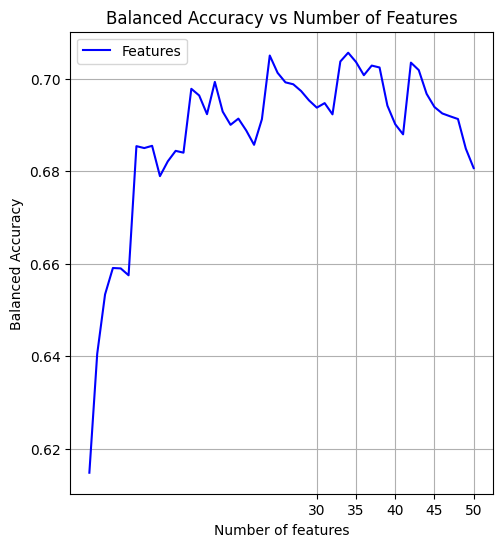

In [70]:
best_params= {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
X_example= X_example.drop('labels', axis=1)
n_feature, feature_df,  clf, scaler=src.best_n_features(X_example,Y_example,best_params)
best_theta_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_theta_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_theta_features1.txt'):
    os.remove('best_theta_features1.txt')
with open('best_theta_features1.txt', 'w') as file:
    file.write(', '.join(best_theta_features))
print("File created and list stored successfully.")

In [ ]:
best_params= src.grid_search(X_theta_pre,Y)
n_feature, feature_df,  clf, scaler=src.best_n_features(X_theta_pre,Y,best_params)
best_theta_pre_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_theta_pre_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_theta_pre_features1.txt'):
    os.remove('best_theta_pre_features1.txt')
with open('best_theta_pre_features1.txt', 'w') as file:
    file.write(', '.join(best_theta_pre_features))
print("File created and list stored successfully.")

In [ ]:
best_params= src.grid_search(X_theta_post,Y)
n_feature, feature_df,  clf, scaler=src.best_n_features(X_theta_post,Y,best_params)
best_theta_post_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_theta_post_features))
print('Best parameters: {}'.format(best_params))


if os.path.exists('best_theta_post_features1.txt'):
    os.remove('best_theta_post_features1.txt')
with open('best_theta_post_features1.txt', 'w') as file:
    file.write(', '.join(best_theta_post_features))
print("File created and list stored successfully.")

#### Frequency Features

In [ ]:
best_params= src.grid_search(X_frequency,Y)
n_feature, feature_df,  clf, scaler=src.best_n_features(X_frequency,Y,best_params)
best_frequency_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_frequency_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_frequency_features1.txt'):
    os.remove('best_frequency_features1.txt')
with open('best_frequency_features1.txt', 'w') as file:
    file.write(', '.join(best_frequency_features))
print("File created and list stored successfully.")

In [ ]:
best_params= src.grid_search(X_frequency_pre,Y)
n_feature, feature_df, clf, scaler=src.best_n_features(X_frequency_pre,Y,best_params)
best_frequency_pre_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_frequency_pre_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_frequency_pre_features1.txt'):
    os.remove('best_frequency_pre_features1.txt')
with open('best_frequency_pre_features1.txt', 'w') as file:
    file.write(', '.join(best_frequency_pre_features))
print("File created and list stored successfully.")

In [ ]:
best_params= src.grid_search(X_frequency_post,Y)
n_feature, feature_df,  clf, scaler=src.best_n_features(X_frequency_post,Y,best_params)
best_frequency_post_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_frequency_post_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_frequency_post_features1.txt'):
    os.remove('best_frequency_post_features1.txt')
with open('best_frequency_post_features1.txt', 'w') as file:
    file.write(', '.join(best_frequency_post_features))
print("File created and list stored successfully.")

#### Temporal Features

In [ ]:
best_params= src.grid_search(X_temporal,Y)
n_feature, feature_df, clf, scaler=src.best_n_features(X_temporal,Y,best_params)
best_temporal_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_temporal_features))
print('Best parameters: {}'.format(best_params))

rel=src.calculate_relevance(X_all[best_temporal_features] ,Y)
red=src.calculate_redundancy(X_all[best_temporal_features])
print('Relevance: {}'.format(rel))
print('Redundancy: {}'.format(red))

if os.path.exists('best_temporal_features1.txt'):
    os.remove('best_temporal_features1.txt')
with open('best_temporal_features1.txt', 'w') as file:
    file.write(', '.join(best_temporal_features))
print("File created and list stored successfully.")

In [ ]:
best_params= src.grid_search(X_temporal_pre,Y)
n_feature, feature_df, clf, scaler=src.best_n_features(X_temporal_pre,Y,best_params)
best_temporal_pre_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_temporal_pre_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_temporal_pre_features1.txt'):
    os.remove('best_temporal_pre_features1.txt')
with open('best_temporal_pre_features1.txt', 'w') as file:
    file.write(', '.join(best_temporal_pre_features))
print("File created and list stored successfully.")

In [ ]:
best_params= src.grid_search(X_temporal_post,Y)
n_feature, feature_df, clf, scaler=src.best_n_features(X_temporal_post,Y,best_params)
best_temporal_post_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_temporal_post_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_temporal_post_features1.txt'):
    os.remove('best_temporal_post_features1.txt')
with open('best_temporal_post_features1.txt', 'w') as file:
    file.write(', '.join(best_temporal_post_features))
print("File created and list stored successfully.")

#### All Features

In [ ]:
best_params= src.grid_search(X_all,Y)
n_feature, feature_df, clf, scaler=src.best_n_features(X_all,Y,best_params)
best_all_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_all_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_all_features1.txt'):
    os.remove('best_all_features1.txt')
with open('best_all_features1.txt', 'w') as file:
    file.write(', '.join(best_all_features))
print("File created and list stored successfully.")

In [ ]:
best_params= src.grid_search(X_all_pre,Y)
n_feature, feature_df, clf, scaler=src.best_n_features(X_all_pre,Y,best_params)
best_all_pre_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_all_pre_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_all_pre_features1.txt'):
    os.remove('best_all_pre_features1.txt')
with open('best_all_pre_features1.txt', 'w') as file:
    file.write(', '.join(best_all_pre_features))
print("File created and list stored successfully.")

In [ ]:
best_params= src.grid_search(X_all_post,Y)
n_feature, feature_df, clf, scaler=src.best_n_features(X_all_post,Y,best_params)
best_all_post_features=feature_df.columns.tolist()
print('Best features: {}'.format(best_all_post_features))
print('Best parameters: {}'.format(best_params))

if os.path.exists('best_all_post_features1.txt'):
    os.remove('best_all_post_features1.txt')
with open('best_all_post_features1.txt', 'w') as file:
    file.write(', '.join(best_all_post_features))
print("File created and list stored successfully.")

In [42]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with all the features

# Function to cap outliers
def cap_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the function to each column except the labels
for column in X_all.columns:
    if column != 'labels':
        df_capped = cap_outliers(X_all, column)



,1_data,2_data,3_data,4_data,5_data,6_data,7_data,8_FP1,8_FPZ,8_FP2,...,36_PO5,36_PO3,36_POZ,36_PO4,36_PO6,36_PO8,36_O1,36_OZ,36_O2,labels
1_data,1.000000,0.665923,0.164745,0.113950,0.595270,0.045783,0.512266,0.445544,0.451641,0.405564,...,-0.063697,-0.033157,-0.031444,-0.057857,-0.070781,-0.074770,-0.069884,-0.058458,-0.084196,0.105640
2_data,0.665923,1.000000,0.105332,0.224454,0.563249,-0.001221,0.499951,0.353701,0.339050,0.321816,...,-0.120230,-0.109286,-0.068736,-0.099990,-0.120658,-0.132768,-0.146434,-0.122314,-0.144300,0.077757
3_data,0.164745,0.105332,1.000000,0.591513,0.001765,0.596640,-0.423418,0.199316,0.184740,0.174257,...,-0.083062,-0.061311,-0.051142,-0.082964,-0.109501,-0.108449,-0.084025,-0.083842,-0.103923,0.028870
4_data,0.113950,0.224454,0.591513,1.000000,0.040027,0.483555,-0.377863,0.185117,0.189208,0.178044,...,-0.097600,-0.103160,-0.062109,-0.097138,-0.110121,-0.114130,-0.117479,-0.112571,-0.119285,-0.011055
5_data,0.595270,0.563249,0.001765,0.040027,1.000000,0.047105,0.517680,-0.026063,-0.015359,-0.059190,...,-0.055582,-0.059909,-0.043244,-0.019895,-0.014094,-0.014059,-0.047328,-0.039395,-0.041820,0.071627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36_PO8,-0.074770,-0.132768,-0.108449,-0.114130,-0.014059,0.031249,0.008603,-0.117907,-0.095270,-0.109170,...,0.605177,0.614058,0.645244,0.762260,0.882780,1.000000,0.709221,0.717421,0.796976,0.022785
36_O1,-0.069884,-0.146434,-0.084025,-0.117479,-0.047328,0.028114,0.005247,-0.117153,-0.122023,-0.115323,...,0.862518,0.791042,0.670031,0.673924,0.736743,0.709221,1.000000,0.840852,0.809435,-0.001448
36_OZ,-0.058458,-0.122314,-0.083842,-0.112571,-0.039395,0.024680,0.019698,-0.090429,-0.090174,-0.083799,...,0.739368,0.734681,0.703029,0.716379,0.772137,0.717421,0.840852,1.000000,0.813507,0.041603
36_O2,-0.084196,-0.144300,-0.103923,-0.119285,-0.041820,0.022750,-0.000227,-0.109133,-0.106871,-0.106967,...,0.680301,0.686235,0.679988,0.758502,0.837982,0.796976,0.809435,0.813507,1.000000,-0.001021


## Dataset 2

In [5]:
import pandas as pd
import numpy as np
import src.functions as src
from sklearn.svm import SVC

features = "dataset2_features.csv"
features = pd.read_csv(features, sep=',', header=0, index_col=None)
Y = features[['labels']]

X_all1 = features.drop('labels', axis=1)
all_pre= ['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_','25_','26_','27_','28_','29_','30_','33_','34_']
X_all_pre=X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in all_pre)]]
all_post=  ['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_','19_','20_','21_','22_','23_','24_','31_','32_','35_','36_']
X_all_post=X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in all_post)]]
print('All Features:')
print('Total: ' + str(len(X_all.columns))) 
print('Pre: ' + str(len(X_all_pre.columns)))
print('Post: ' + str(len(X_all_post.columns)))

theta_prefixes= ['1_','2_','3_','4_','5_','6_','7_','8_','9_','10_','11_','12_','13_','14_','15_','16_','17_','18_']
X_theta= X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in theta_prefixes)]]
theta_pre= ['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_']
X_theta_pre= X_theta[[col for col in X_theta.columns if any(col.startswith(prefix) for prefix in theta_pre)]]
theta_post= ['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_']
X_theta_post= X_theta[[col for col in X_theta.columns if any(col.startswith(prefix) for prefix in theta_post)]]
print('Theta Features:')
print('Total: ' + str(len(X_theta.columns)))
print('Pre: ' + str(len(X_theta_pre.columns)))
print('Post: ' + str(len(X_theta_post.columns)))

frequency_prefixes= ['1_','2_','3_','4_','5_','6_','7_','8_','9_','10_','11_','12_','13_','14_','15_','16_','17_','18_','19_','20_','21_','22_','23_','24_','25_','26_','27_','28_','29_','30_']
X_frequency= X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in frequency_prefixes)]]
frequency_pre=['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_','25_','26_','27_','28_','29_','30_']
X_frequency_pre= X_frequency[[col for col in X_frequency.columns if any(col.startswith(prefix) for prefix in frequency_pre)]]
frequency_post=['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_','19_','20_','21_','22_','23_','24_']
X_frequency_post= X_frequency[[col for col in X_frequency.columns if any(col.startswith(prefix) for prefix in frequency_post)]]
print('Frequency Features:')
print('Total: ' + str(len(X_frequency.columns)))
print('Pre: ' + str(len(X_frequency_pre.columns)))
print('Post: ' + str(len(X_frequency_post.columns)))

temporal_prefixes= ['31_','32_','33_','34_','35_','36_']
X_temporal= X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in temporal_prefixes)]]
temporal_pre= ['33_','34_']
X_temporal_pre= X_temporal[[col for col in X_temporal.columns if any(col.startswith(prefix) for prefix in temporal_pre)]] 
temporal_post= ['31_','32_','35_','36_']
X_temporal_post= X_temporal[[col for col in X_temporal.columns if any(col.startswith(prefix) for prefix in temporal_post)]]
print('Temporal Features:')
print('Total: ' + str(len(X_temporal.columns)))
print('Pre: ' + str(len(X_temporal_pre.columns)))
print('Post: ' + str(len(X_temporal_post.columns)))

All Features:
Total: 1549
Pre: 804
Post: 806
Theta Features:
Total: 587
Pre: 324
Post: 324
Frequency Features:
Total: 1307
Pre: 684
Post: 684
Temporal Features:
Total: 242
Pre: 120
Post: 122


In [6]:
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

def test_on_second_dataset(X_test_2, Y_test_2, trained_clf, trained_scaler):
    # Standardize the second dataset using the scaler from the training step
    X_test_2_scaled = trained_scaler.transform(X_test_2)
    
    # Predict the labels for the second dataset
    Y_pred_2 = trained_clf.predict(X_test_2_scaled)
    
    # Predict the probabilities for the second dataset (optional, if you need probabilities)
    Y_pred_prob_2 = trained_clf.predict_proba(X_test_2_scaled)[:, 1]
    
    # Calculate the balanced accuracy
    bal_acc_2 = balanced_accuracy_score(Y_test_2, Y_pred_2)
    
    # Calculate other metrics as needed
    f1 = f1_score(Y_test_2, Y_pred_2)
    precision = precision_score(Y_test_2, Y_pred_2)
    recall = recall_score(Y_test_2, Y_pred_2)
    roc_auc = roc_auc_score(Y_test_2, Y_pred_prob_2)
    
    # Print the results
    print("Balanced Accuracy on second dataset: {:.4f}".format(bal_acc_2))
    print("F1 Score: {:.4f}".format(f1))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("ROC AUC Score: {:.4f}".format(roc_auc))
    
    return Y_pred_2, Y_pred_prob_2, bal_acc_2


# Assuming trained_clf and trained_scaler are your trained classifier and scaler respectively
Y_pred_2, Y_pred_prob_2, bal_acc_2 = test_on_second_dataset(X_all1[best_all_features], Y, clf, scaler)


Balanced Accuracy on second dataset: 0.5439
F1 Score: 0.2473
Precision: 0.2368
Recall: 0.2587
ROC AUC Score: 0.5677


## Test Set

### Theta Features

In [ ]:
with open('best_theta_features.txt', 'r') as file:
    best_theta_features = file.read().split(', ')
params= {'kernel': 'rbf'}
test_size=0.1
X= X_theta[best_theta_features]
print(best_theta_features)
bal_acc=src.classification(len(best_theta_features),X,Y, params,test_size)

### Frequency Features

In [ ]:
with open('best_frequency_features.txt', 'r') as file:
    best_frequency_features = file.read().split(', ')
params= {'kernel': 'rbf'}
test_size=0.1
X= X_frequency[best_frequency_features]
print(best_frequency_features)
bal_acc=src.classification(len(best_frequency_features),X,Y, params,test_size)

### Temporal Features

In [ ]:
with open('best_temporal_features.txt', 'r') as file:
    best_temporal_features = file.read().split(', ')
params= {'kernel': 'rbf'}
test_size=0.1
X= X_temporal[best_temporal_features]
print(best_temporal_features)
bal_acc=src.classification(len(best_temporal_features),X,Y, params,test_size)

### All Features

In [8]:
with open('best_all_features2.txt', 'r') as file:
    best_all_features = file.read().split(', ')
params= src.grid_search(X_all,Y)
test_size=0.1
X= X_all[best_all_features]
print(params)
print(best_all_features)
bal_acc=src.classification(len(best_all_features),X,Y, params,test_size)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
['1_data', '11_FT8', '33_TP7', '13_CP3', '10_P4', '15_PO4', '12_F4', '35_C3', '17_F3', '21_CZ', '13_AF3', '12_F1', '33_CZ', '12_F8', '8_F1', '34_F4', '27_P5', '12_AF3', '35_CPZ', '7_data', '20_F8', '33_FCZ', '12_F3', '8_F3', '10_C5', '8_FCZ', '27_P4', '35_OZ']
Number of features used: 28
Mean Sensitivity: 0.5753
Std Sensitivity: 0.1219
Mean Specificity: 0.7068
Std Specificity: 0.0298
Mean Balanced Accuracy: 0.6411
Std Balanced Accuracy: 0.0604
